In [1]:
repo_path = '~/repos/forecastNN'

In [2]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0, repo_path)
from forecastNN.seq2seq import Seq2SeqForecaster

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline

## Generate Data
See: https://github.com/ageron/handson-ml2/blob/master/15_processing_sequences_using_rnns_and_cnns.ipynb

In [4]:
batch_size = 10000
n_steps = 50
pred_steps = 10


def generate_time_series_df(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))  #   wave 1
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20))  # + wave 2
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)  # + noise

    return pd.DataFrame(series[..., np.newaxis].astype(np.float32)[:, :, 0])


df = generate_time_series_df(batch_size, n_steps + pred_steps)

## Build Model

In [5]:
model = Seq2SeqForecaster(10)

model.compile()

## Fit Model

In [6]:
model.fit_df(df, epochs=5)
model.fit_df(df, epochs=5)
model.fit_df(df, epochs=5)

Train on 8000 samples, validate on 2000 samples
Epoch 1/5
8000/8000 [==============================] - 12s 1ms/sample - loss: 0.0723 - val_loss: 0.0499
Epoch 2/5
8000/8000 [==============================] - 7s 926us/sample - loss: 0.0436 - val_loss: 0.0387
Epoch 3/5
8000/8000 [==============================] - 7s 936us/sample - loss: 0.0362 - val_loss: 0.0345
Epoch 4/5
8000/8000 [==============================] - 8s 976us/sample - loss: 0.0327 - val_loss: 0.0314
Epoch 5/5
8000/8000 [==============================] - 8s 950us/sample - loss: 0.0309 - val_loss: 0.0299
Train on 8000 samples, validate on 2000 samples
Epoch 1/5
8000/8000 [==============================] - 7s 895us/sample - loss: 0.0296 - val_loss: 0.0289
Epoch 2/5
8000/8000 [==============================] - 7s 869us/sample - loss: 0.0287 - val_loss: 0.0278
Epoch 3/5
8000/8000 [==============================] - 8s 970us/sample - loss: 0.0278 - val_loss: 0.0271
Epoch 4/5
8000/8000 [==============================] - 7s 921us/s

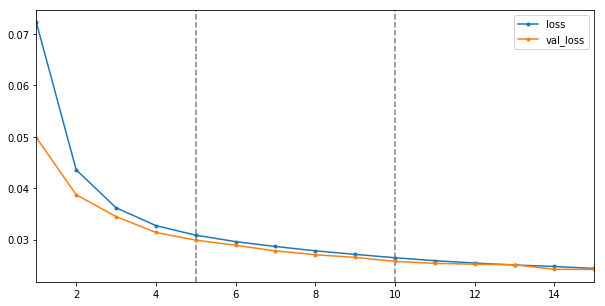

In [7]:
model.plot_history()

## Predict

In [11]:
test_batch_size = 10

test_df = generate_time_series_df(test_batch_size, n_steps + pred_steps)

In [12]:
preds = model.predict_df(test_df, last_only=False)

preds.shape

(10, 60, 10)

## Fit Example

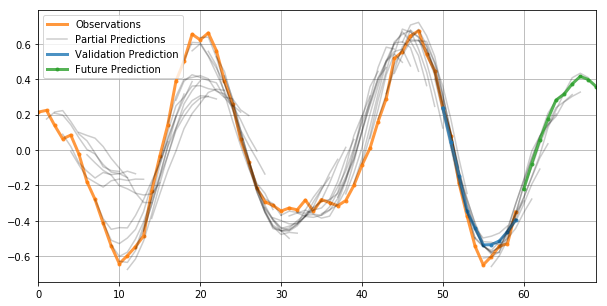

In [14]:
model.plot_example_fit(test_df, loc=0)